# Random Forest

## Motivation

Below is an Ox a cow from a weight judging competition from 1906 year. 787 participants guessed the weight of the cow. The median error of individual guesses was around 3.1%, while overall median of the guesses was only 0.7%. This is an example of the wisdom of the crowd principle used for <b>ensemble</b> training. 

### Ox - a cow

```{image} ml_rf1.jpg
:alt: img-recognition
:class: bg-primary mb-1
:width: 500px
:align: center
```

### Predictions of the crowd

```{image} ml_rf2.jpg
:alt: img-recognition
:class: bg-primary mb-1
:width: 500px
:align: center
```

Mathematically this approach comes from bias-variance decomposition principle, where an error of the estimator is happen to come from bias of the estimator and its variance. Assuming, we have a lot of unbiased simple estimators, by combining them we can reduce the variance of the overall prediction, thus reducing the error. 

Mathematically, it can also be seen from the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) in statistics. Where, the more samples we have, the less the variance term would be. And it will decrease as $ \frac{1}{N} $.

For this method to work, simple predictors must not be highly correlated. Otherwise, variance decrease would be much smaller. 

Consider bias-variance decomposition:

$$
\mathbb E\big[(f(\mathbf x) - \widehat y)^2 \big]=
\mathbb E\big[(f(\mathbf x) - \mathbb E\widehat y + \mathbb E\widehat y - \widehat y)^2 \big] = \mathbb E\big(\underbrace{f(\mathbf x) - \mathbb E\widehat y}_{\mathrm{bias}}\big)^2 + \underbrace{\mathbb E\big[(\mathbb E\widehat y - \widehat y)^2\big]}_{\mathrm{variance}}.
$$

Now, suppose that $\widehat y = \frac{\sum_{i=1}^{n} y_i}{n}$. With $\mathbb E y_i = \mathbb E \widehat y$. Then, assuming independence or at least little correlations of $y_i$ predictions, we can derive: 

$$
\mathbb E\big[(\mathbb E\widehat y - \widehat y)^2\big] = \mathbb E\big[\big(\frac{\sum_{i=1}^{n} (\mathbb E y_i - y_i)}{n}\big)^2\big] = \frac{\mathbb E\big[(\sum_{i=1}^{n} (\mathbb E y_i - y_i))^2\big]}{n^2} \approx \frac{\sum_{i=1}^{n} \mathbb E\big[(\mathbb E y_i - y_i)^2\big]}{n^2} = \frac{\mathbb E\big[(\mathbb E y_i - y_i)^2\big]}{n}
$$


We can see that our final variance is reduced by $\frac{1}{n}$ from the variance of individual predictions, in case we have several uncorrelated trees, it would reduce our variance term in the error by the number of predictors we have. Below we will discuss several approaches, such as bagging and attribute sampling that allow to grow trees with little correlations with each other.   

<span style="display:none" id="question1">W3sicXVlc3Rpb24iOiAiSW1hZ2luZSB5b3UgaGF2ZSBlbnNlbWJsZSBvZiBrIHVuY29ycmVsYXRlZCB0cmVlcy4gQnkgaG93IG11Y2ggd2lsbCB0aGUgdmFyaWFuY2Ugb2YgdGhlIGVycm9yIGRlY3JlYXNlIGNvbXBhcmVkIHRvIGhhdmluZyBvbmx5IDEgdHJlZT8iLCAidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJzIjogW3siYW5zd2VyIjogIiQkIGsgJCQiLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJDb3JyZWN0ISJ9LCB7ImFuc3dlciI6ICIkJCBrXjIgJCQiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0ISJ9LCB7ImFuc3dlciI6ICIkJCBrLzIgJCQiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiVGhlIGFuc3dlciBpcyB3cm9uZyEifSwgeyJhbnN3ZXIiOiAiJCQgMSAkJCIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJJbmNvcnJlY3QhIn1dfV0=</span>

In [47]:
from jupyterquiz import display_quiz
display_quiz("#question1")

<IPython.core.display.Javascript object>

## Random forest


Random Forest uses this idea to train multiple decision trees and then combine them together into an ensemble. Each decision tree is trained using some random noise that comes from the way they are trained. They are two approaches <b>bagging</b> and <b>attribute sampling</b> that allows to train weakly correlated individual trees, which we will discuss below.


## Bagging

Despite it was disscussed in another section, let's illustrate how bagging would work in a random forest setting. 

Idea of bagging or <b>b</b>ootstrap <b>agg</b>regat<b>ing</b> comes from statistical bootstrap method, where training data for the individual decision tree is sampled from the original training data with replacement, so that the final size of data is still equal to the original size. The sampled subset is typically of the size 67% of the original data. To fill the remaining size, replacement is used. Let's consider how bagging splits the training data on example of a dataset of size 6. 

| Tree id | Sample 1 | Sample 2 | Sample 3 | Sample 4 | Sample 5 | Sample 6 |
|:-------:|----------|----------|----------|----------|----------|----------|
| Original data | 1 | 1 | 1 | 1 | 1 | 1 |
| 1st Tree | 1 | 2 | 0 | 2 | 0 | 1 |
| 2nd Tree | 0 | 1 | 1 | 0 | 3 | 1 |
| 3rd Tree | 2 | 0 | 1 | 2 | 1 | 0 |

Each row represents whether the sample is included for the training of the tree and number of resamplements of the data point, so that in total sum of resamplements is 6. This kind of method already influences into making trees less correlated.

## Attribute sampling

```{admonition}
:class: tip
Attribute sampling means that at each split of the decision trees instead of looking at the whole set of available features, we only look at the subset of features which are chosen randomly. For regression task usually one third of total number of available features are considered, while for classification usually square root of total number of features are considered. This method is similar to a droupout technique in neural networks where we drop a proportion of available features, which helps to prevent overfitting. But, for training random forests it usually is used for making individual trees different from one each other, so that their ensemble will be stronger than each possibly individual tree could be. 
```


### Attribute sampling

```{image} ml_rf3.jpg
:alt: img-recognition
:class: bg-primary mb-1
:width: 500px
:align: center
```

Consider an example above, with four features in total, but only three of them are randomly picked (light yellow color) during each split to decide the best split (red color for the best split). 

In `sklearn` package, we can pass the attribute sampling parameter through `max_features` parameter into both `RandomForestClassifier` and `RandomForestRegressor` clases. It accepts integers to define number explicitly, floats as a ratio from total number of features, and using keywords like `sqrt` for a square root from total number.

## Synthetic example of benefits from ensemble 

Let's create a syntethic example of classifying points being inside circle of radius 0.8.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x1, x2 = np.meshgrid(np.linspace(-1, 1, 300), np.linspace(-1, 1, 300))
x1, x2 = x1.reshape(300 * 300), x2.reshape(300 * 300)

ys = []
for a, b in zip(x1, x2):
    ys.append(a ** 2 + b ** 2 <= 0.8)
    
df = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'y': ys
})

Train random forest classifier.

In [23]:
from sklearn.ensemble import RandomForestClassifier

X = df[['x1', 'x2']].values
clf = RandomForestClassifier(max_depth = 7, n_estimators = 10, random_state=0)
clf.fit(X, df.y)
y_pred = clf.predict(X)

Show predictions and true labels. We can see that we have good classifications using random forest, which can be further improved by increasing `max_depth` parameter.

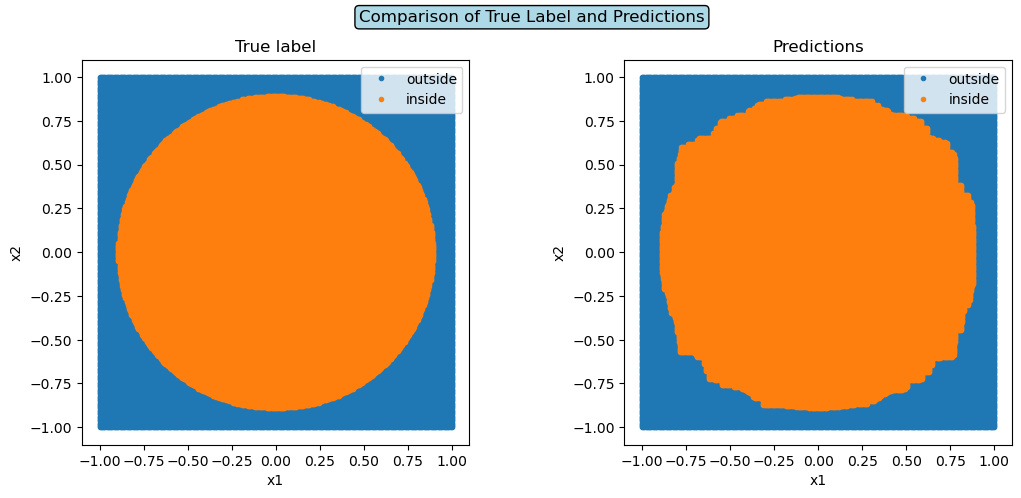

In [29]:
def plot(inside, plt, title):
    plt.plot(df[~inside].x1, df[~inside].x2, '.', label = 'outside')
    plt.plot(df[inside].x1, df[inside].x2, '.', label = 'inside')
    plt.set_title(title)
    plt.legend()
    plt.set_xlabel('x1')
    plt.set_ylabel('x2')

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plot(df.y, axs[0], 'True label')
plot(y_pred, axs[1], 'Predictions')
fig.suptitle('Comparison of True Label and Predictions', fontsize=12, bbox=dict(facecolor='lightblue', boxstyle='round,pad=0.25'))
plt.subplots_adjust(wspace=0.4)
plt.show()


Now let's look into individual predictions. We can see that their quality is much worse than the random forest ensemble. But, on average they are better than each individual tree.

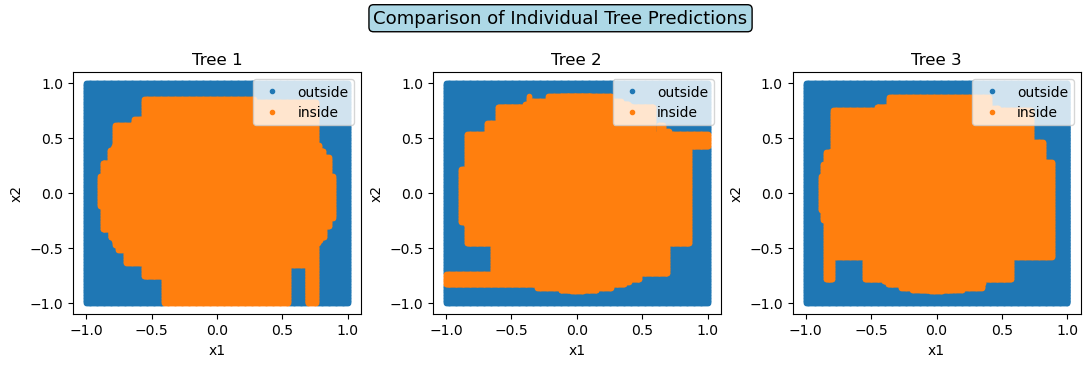

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(13, 3.5))
for i in range(3):
    y_pred = clf.estimators_[i].predict(X)
    plot(y_pred > 0.5, axs[i], 'Tree %d' % (i + 1))

fig.suptitle('Comparison of Individual Tree Predictions', fontsize=13, bbox=dict(facecolor='lightblue', boxstyle='round,pad=0.25'))
plt.subplots_adjust(top=0.8) 
plt.subplots_adjust(wspace=0.25)
plt.show()


## Does random forest overfit?

There is a general property of a random forest that when we increase number of decision trees in the ensemble the accuracy almost never reduces on the validation dataset. Which means adding more decision trees cannot lead random forest to overfit. Let's test it on the `California Housing dataset`.

First let's look into the general training procedure of the `RandomForestRegressor` class.

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset as an example
data = fetch_california_housing()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor with 100 trees (estimators)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest Regressor on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error: 0.26
R-squared (R2) Score: 0.81


Now define a function which would return r2 score from a regressor model. And train random forest models with different `n_estimators` parameter, which corresponds to number of decision trees in the ensemble.

In [8]:
def get_r2(rf_model):
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    return r2_score(y_test, y_pred)


nestimators = []
r2s = []
for i in range(1, 202, 10):
    rf_model = RandomForestRegressor(n_estimators=i, random_state=42)
    r2 = get_r2(rf_model)
    nestimators.append(i)
    r2s.append(r2)
    break

From the plot below we can see that our accuracy will keep improving, but never reduces after adding additional trees. Which means this parameter never leads to <b>overfitting</b>, but can only slow down the training. Since, it is more expensive to train many trees.

![image info](./plot_r2.png)

```{note}
**Choosing the Right Number of Decision Trees**
```
<span style="display:none" id="question2">W3sicXVlc3Rpb24iOiAiV2hhdCBzaG91bGQgYmUgY29uc2lkZXJlZCB3aGVuIGNob29zaW5nIHRoZSBudW1iZXIgb2YgZGVjaXNpb24gdHJlZXMgKG5fZXN0aW1hdG9ycykgaW4gYSByYW5kb20gZm9yZXN0PyIsICJ0eXBlIjogIm1hbnlfY2hvaWNlIiwgImFuc3dlcnMiOiBbeyJhbnN3ZXIiOiAiQWx3YXlzIGNob29zZSB0aGUgbWF4aW11bSBwb3NzaWJsZSBudW1iZXIgb2YgdHJlZXMgZm9yIGJldHRlciBhY2N1cmFjeS4iLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0ISBDaG9vc2luZyB0aGUgbWF4aW11bSBudW1iZXIgb2YgdHJlZXMgbWF5IG5vdCBuZWNlc3NhcmlseSBsZWFkIHRvIGJldHRlciBhY2N1cmFjeSwgYW5kIGl0IGNhbiBpbmNyZWFzZSB0cmFpbmluZyB0aW1lIHNpZ25pZmljYW50bHkuIn0sIHsiYW5zd2VyIjogIlNlbGVjdCB0aGUgbWluaW11bSBudW1iZXIgb2YgdHJlZXMgdG8gYXZvaWQgb3ZlcmZpdHRpbmcuIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdCEgU2VsZWN0aW5nIHRoZSBtaW5pbXVtIG51bWJlciBvZiB0cmVlcyBtYXkgcmVzdWx0IGluIHVuZGVyZml0dGluZywgYW5kIHRoZSBtb2RlbCBtaWdodCBub3QgY2FwdHVyZSB0aGUgY29tcGxleGl0eSBvZiB0aGUgdW5kZXJseWluZyBkYXRhLiJ9LCB7ImFuc3dlciI6ICJDaG9vc2UgYSBtaWRkbGUgcG9pbnQgdGhhdCBiYWxhbmNlcyBhY2N1cmFjeSBhbmQgdHJhaW5pbmcgc3BlZWQuIiwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiQ29ycmVjdCEgQSBiYWxhbmNlIHNob3VsZCBiZSBzdHJ1Y2sgYmV0d2VlbiB0aGUgbnVtYmVyIG9mIGRlY2lzaW9uIHRyZWVzIChuX2VzdGltYXRvcnMpIHRvIGFjaGlldmUgYSBnb29kIHRyYWRlLW9mZiBiZXR3ZWVuIGFjY3VyYWN5IGFuZCB0cmFpbmluZyBzcGVlZC4ifSwgeyJhbnN3ZXIiOiAiVGhlIG51bWJlciBvZiBkZWNpc2lvbiB0cmVlcyBkb2VzIG5vdCBpbXBhY3QgdGhlIG1vZGVsJ3MgcGVyZm9ybWFuY2UuIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdCEgVGhlIG51bWJlciBvZiBkZWNpc2lvbiB0cmVlcyAobl9lc3RpbWF0b3JzKSBpcyBhbiBpbXBvcnRhbnQgaHlwZXJwYXJhbWV0ZXIgdGhhdCBjYW4gaW1wYWN0IHRoZSBwZXJmb3JtYW5jZSBvZiBhIHJhbmRvbSBmb3Jlc3QgbW9kZWwuIn1dfV0=</span>    

In [38]:
display_quiz("#question2")

<IPython.core.display.Javascript object>

## Feature importance

`SkLearn` provides a very convenient way to understand which feature is considered important for making a prediction in random forests. It provides calculated importances based on the [impurity reduction](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_). We know that each node in the decision tree performs the split of the data based on some impurity criterion, mean square error for regression tasks and gini/entropy for a classification task. Each node using feature values performs the split that reduces impurity of the data. And normalized total reduction of impurity brought by a feature is calculated in `feature_importances_` attribute.

Let's get back to our `California Housing dataset`, and see which features are more important. The higher the value, the higher is importance, which can be used for further feature selection.

In [10]:
import pandas as pd
import plotly.express as px
importance_df = pd.DataFrame({
    'feature_importance': rf_regressor.feature_importances_,
    'feature_names': data.feature_names
})

importance_df.sort_values('feature_importance', inplace=True)
importance_df.set_index('feature_names', inplace=True)

fig = px.bar(importance_df, x='feature_importance', orientation='h', labels={'feature_importance': 'Feature Importance'})

fig.update_layout(title_text='Feature Importance',
                  xaxis_title='Importance',
                  yaxis_title='Feature Names',
                    width=700,
                  height=400)

fig.show()

```{admonition} Quiz
:class: important
You have trained a Random Forest model to predict housing prices, and you want to assess the importance of features. After training, you extract feature importances. The feature importances are as follows: Feature A - 0.25, Feature B - 0.20, Feature C - 0.15, Feature D - 0.10, Feature E - 0.30.
```
<span style="display:none" id="rf_feature_importance_mc_question">W3sicXVlc3Rpb24iOiAiV2hpY2ggc3RhdGVtZW50IGFjY3VyYXRlbHkgcmVmbGVjdHMgdGhlIGltcG9ydGFuY2Ugb2YgdGhlc2UgZmVhdHVyZXM/IiwgInR5cGUiOiAibWFueV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICJGZWF0dXJlIEUgaXMgdGhlIG1vc3QgaW1wb3J0YW50IGZlYXR1cmUgaW4gcHJlZGljdGluZyBob3VzaW5nIHByaWNlcy4iLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJDb3JyZWN0ISBGZWF0dXJlIEUgaGFzIHRoZSBoaWdoZXN0IGltcG9ydGFuY2Ugc2NvcmUgb2YgMC4zMCwgaW5kaWNhdGluZyBpdCBpcyB0aGUgbW9zdCBpbXBvcnRhbnQgZmVhdHVyZSBpbiBwcmVkaWN0aW5nIGhvdXNpbmcgcHJpY2VzIGluIHRoaXMgUmFuZG9tIEZvcmVzdCBtb2RlbC4ifSwgeyJhbnN3ZXIiOiAiRmVhdHVyZSBEIGlzIHRoZSBsZWFzdCBpbXBvcnRhbnQgZmVhdHVyZSBpbiBwcmVkaWN0aW5nIGhvdXNpbmcgcHJpY2VzLiIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJJbmNvcnJlY3QhIFdoaWxlIEZlYXR1cmUgRCBoYXMgdGhlIGxvd2VzdCBpbXBvcnRhbmNlIHNjb3JlLCBpdCBkb2Vzbid0IG5lY2Vzc2FyaWx5IG1ha2UgaXQgdGhlIGxlYXN0IGltcG9ydGFudC4gSW50ZXJwcmV0IHRoZSBpbXBvcnRhbmNlIHNjb3JlcyByZWxhdGl2ZSB0byBlYWNoIG90aGVyLiJ9LCB7ImFuc3dlciI6ICJGZWF0dXJlcyBBIGFuZCBCIGFyZSBlcXVhbGx5IGltcG9ydGFudCBpbiBwcmVkaWN0aW5nIGhvdXNpbmcgcHJpY2VzLiIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJJbmNvcnJlY3QhIEZlYXR1cmUgQSBoYXMgYSBoaWdoZXIgaW1wb3J0YW5jZSBzY29yZSB0aGFuIEZlYXR1cmUgQiwgc28gdGhleSBhcmUgbm90IGVxdWFsbHkgaW1wb3J0YW50LiBBc3Nlc3MgdGhlIHNjb3JlcyByZWxhdGl2ZSB0byBlYWNoIG90aGVyLiJ9LCB7ImFuc3dlciI6ICJUaGUgc3VtIG9mIGltcG9ydGFuY2Ugc2NvcmVzIGZvciBhbGwgZmVhdHVyZXMgaXMgMS4wLiIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJJbmNvcnJlY3QhIFRoZSBzdW0gb2YgaW1wb3J0YW5jZSBzY29yZXMgY2FuIGJlIGxlc3MgdGhhbiBvciBncmVhdGVyIHRoYW4gMS4wLiBUaGUgc2NvcmVzIHJlcHJlc2VudCB0aGUgcmVsYXRpdmUgaW1wb3J0YW5jZSB3aXRoaW4gdGhlIGZlYXR1cmVzLCBub3QgdGhlIHRvdGFsIGltcG9ydGFuY2UuIn1dfV0=</span>

In [11]:
display_quiz("#rf_feature_importance_mc_question")

<IPython.core.display.Javascript object>

````{admonition} Question
How does SkLearn determine feature importance when using random forests, and what criteria and metrics are employed to calculate the importance of each feature in the context of decision trees?
```{admonition} Answer
:class: tip, dropdown
SkLearn determines feature importance in random forests by calculating the normalized total reduction of impurity brought by each feature during data splits. For decision trees, impurity criteria like mean square error for regression or Gini/entropy for classification are used. The feature_importances_ attribute holds the calculated importance values, aiding in further feature selection.
```
````

## Parameters of a Random Forest

There are two classes related to Random Forests in `sklearn` library, the first one is `RandomForestRegressor` which is used for regression tasks. The second one is `RandomForestClassifier` which is used for classification tasks. Each of them have similar set of parameters, which we discuss below. And we will clearly show how these parameters affect learning.

#### n_estimators
Parameter corresponds to the number of trees in the forest.

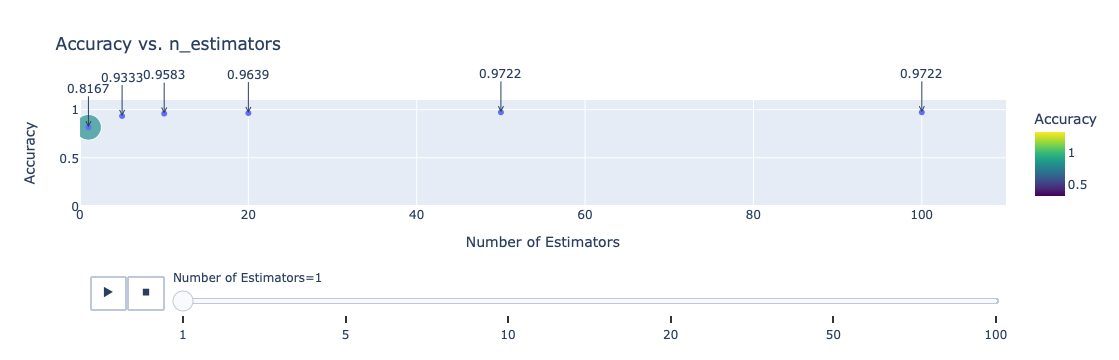

In [43]:
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_estimators_list = [1, 5, 10, 20, 50, 100]

data_dict = {'n_estimators': [], 'accuracy': []}

for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    data_dict['n_estimators'].append(n_estimators)
    data_dict['accuracy'].append(accuracy)

import pandas as pd
df = pd.DataFrame(data_dict)

fig = px.scatter(df, x='n_estimators', y='accuracy', title='Accuracy vs. n_estimators',
                 labels={'n_estimators': 'Number of Estimators', 'accuracy': 'Accuracy'},
                 animation_frame='n_estimators', range_x=[min(n_estimators_list) - 1, max(n_estimators_list) + 10],
                 range_y=[0, 1.1],
                 color='accuracy', size='accuracy', color_continuous_scale='Viridis',
                 symbol='accuracy', symbol_sequence=['circle-dot'])

for i in range(len(n_estimators_list)):
    fig.add_trace(px.scatter(df.iloc[i:i+1], x='n_estimators', y='accuracy').data[0])
    fig.add_annotation(
        x=df['n_estimators'][i],
        y=df['accuracy'][i],
        text=f'{df["accuracy"][i]:.4f}',
        showarrow=True,
        arrowhead=5,
        ax=0,
        ay=-40
    )

fig.update_layout(showlegend=False)

fig.show()


#### criterion 
This is optimization objective that is minimized. We have several options for a regression: `squared_error`, `absolute_error`. And several for a classification: `gini`, `entropy`, `log_loss`.

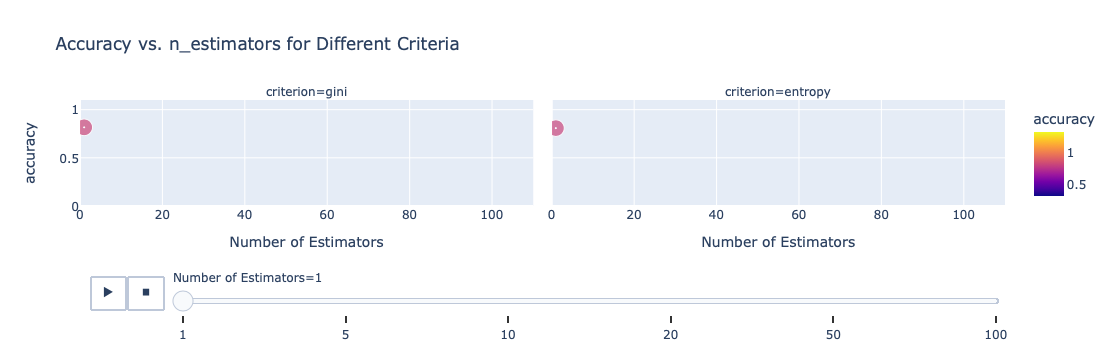

In [40]:
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_estimators_list = [1, 5, 10, 20, 50, 100]
criteria = ['gini', 'entropy']

data_dict = {'n_estimators': [], 'accuracy': [], 'criterion': []}

for criterion in criteria:
    for n_estimators in n_estimators_list:
        model = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        data_dict['n_estimators'].append(n_estimators)
        data_dict['accuracy'].append(accuracy)
        data_dict['criterion'].append(criterion)

df = pd.DataFrame(data_dict)

fig = px.scatter(df, x='n_estimators', y='accuracy', title='Accuracy vs. n_estimators for Different Criteria',
                 labels={'n_estimators': 'Number of Estimators'},
                 animation_frame='n_estimators', range_x=[0, max(n_estimators_list) + 10], range_y=[0, 1.1],
                 color='accuracy',  symbol_sequence=['circle-dot'], facet_col='criterion',
                 size='accuracy', size_max=13) 

fig.show()


#### max_depth 
Maximum depth of the trees. Mostly used for regularization, so that individual trees do not overfit much.

#### min_samples_split
Another parameter that prevents overfitting. Corresponds to the minimum number of samples required to split an internal node.

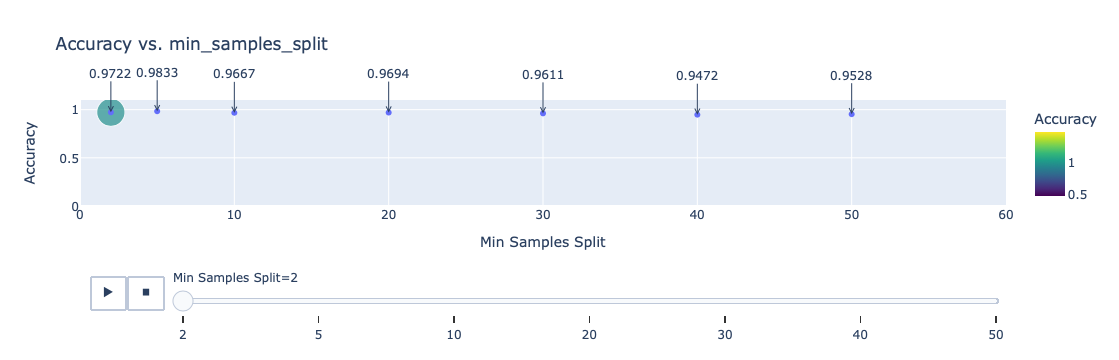

In [44]:
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

min_samples_split_list = [2, 5, 10, 20,30,40, 50]

data_dict = {'min_samples_split': [], 'accuracy': []}

for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split=min_samples_split, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    data_dict['min_samples_split'].append(min_samples_split)
    data_dict['accuracy'].append(accuracy)

import pandas as pd
df = pd.DataFrame(data_dict)

fig = px.scatter(df, x='min_samples_split', y='accuracy', title='Accuracy vs. min_samples_split',
                 labels={'min_samples_split': 'Min Samples Split', 'accuracy': 'Accuracy'},
                 animation_frame='min_samples_split', range_x=[0, max(min_samples_split_list) + 10], range_y=[0, 1.1],
                 color='accuracy', size='accuracy', color_continuous_scale='Viridis',
                 symbol='accuracy', symbol_sequence=['circle-dot'])

for i in range(len(min_samples_split_list)):
    fig.add_trace(px.scatter(df.iloc[i:i+1], x='min_samples_split', y='accuracy').data[0])
    fig.add_annotation(
        x=df['min_samples_split'][i],
        y=df['accuracy'][i],
        text=f'{df["accuracy"][i]:.4f}',
        showarrow=True,
        arrowhead=5,
        ax=0,
        ay=-40
    )
fig.update_layout(showlegend=False)

fig.show()


#### min_samples_leaf 
This parameter makes sure to leave at least this much sample points in the left and right branches after the split.

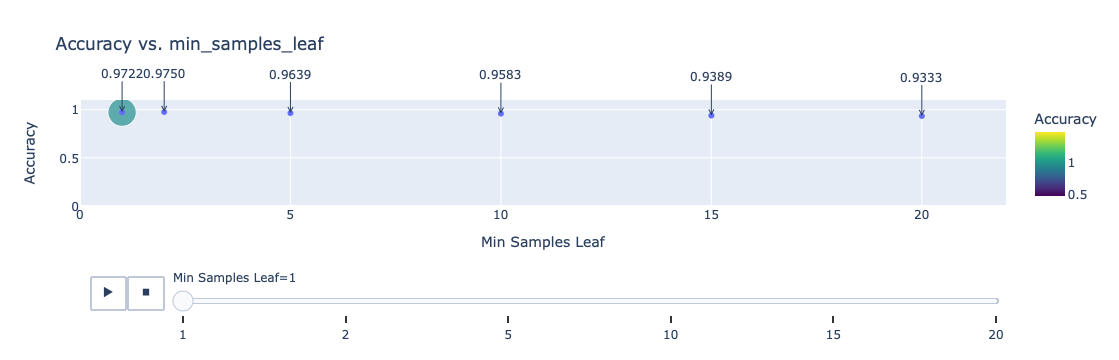

In [46]:
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

min_samples_leaf_list = [1, 2, 5, 10,15, 20]

data_dict = {'min_samples_leaf': [], 'accuracy': []}

for min_samples_leaf in min_samples_leaf_list:
    model = RandomForestClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    data_dict['min_samples_leaf'].append(min_samples_leaf)
    data_dict['accuracy'].append(accuracy)

import pandas as pd
df = pd.DataFrame(data_dict)

fig = px.scatter(df, x='min_samples_leaf', y='accuracy', title='Accuracy vs. min_samples_leaf',
                 labels={'min_samples_leaf': 'Min Samples Leaf', 'accuracy': 'Accuracy'},
                 animation_frame='min_samples_leaf', range_x=[0, max(min_samples_leaf_list) + 2], range_y=[0, 1.1],
                 color='accuracy', size='accuracy', color_continuous_scale='Viridis',
                 symbol='accuracy', symbol_sequence=['circle-dot'])

for i in range(len(min_samples_leaf_list)):
    fig.add_trace(px.scatter(df.iloc[i:i+1], x='min_samples_leaf', y='accuracy').data[0])
    fig.add_annotation(
        x=df['min_samples_leaf'][i],
        y=df['accuracy'][i],
        text=f'{df["accuracy"][i]:.4f}',
        showarrow=True,
        arrowhead=5,
        ax=0,
        ay=-40
    )

fig.update_layout(showlegend=False)

fig.show()


#### max_features
A feature that is occurs purely in Random Forests. As you remember in attribute sampling section, we consider only subset of features to split the node. This parameter sets number of features to consider in the split. 

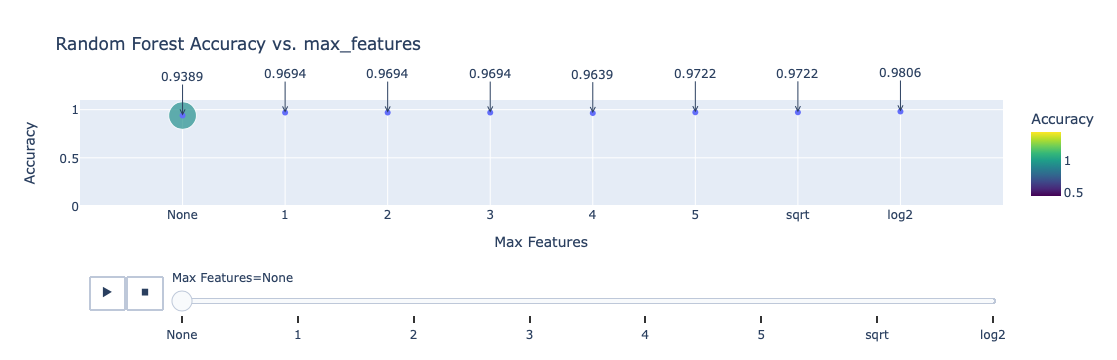

In [42]:
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_features_list = [None, 1, 2, 3, 4, 5, 'sqrt', 'log2']

data_dict = {'max_features': [], 'accuracy': []}

for max_features in max_features_list:
    model = RandomForestClassifier(max_features=max_features, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    data_dict['max_features'].append(str(max_features))
    data_dict['accuracy'].append(accuracy)

import pandas as pd
df = pd.DataFrame(data_dict)

fig = px.scatter(df, x='max_features', y='accuracy', title='Accuracy vs. max_features',
                 labels={'max_features': 'Max Features', 'accuracy': 'Accuracy'},
                 animation_frame='max_features', range_x=[-1, len(max_features_list)], range_y=[0, 1.1],
                 color='accuracy', size='accuracy', color_continuous_scale='Viridis',
                 symbol='accuracy', symbol_sequence=['circle-dot'])

for i in range(len(max_features_list)):
    fig.add_trace(px.scatter(df.iloc[i:i+1], x='max_features', y='accuracy').data[0])
    fig.add_annotation(
        x=df['max_features'][i],
        y=df['accuracy'][i],
        text=f'{df["accuracy"][i]:.4f}',
        showarrow=True,
        arrowhead=5,
        ax=0,
        ay=-40
    )

fig.update_layout(showlegend=False)

fig.show()


#### bootstrap
As you remember in bagging section. Each tree in Random Forests uses different samples of the training data, as is in bootstrap sampling of the data. This parameter sets this option if `true` or makes each tree to train on the whole dataset if `false`. 

In [ ]:
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bootstrap_values = [True, False]

data_dict = {'bootstrap': [], 'accuracy': []}

for bootstrap in bootstrap_values:
    model = RandomForestClassifier(bootstrap=bootstrap, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    data_dict['bootstrap'].append(str(bootstrap))
    data_dict['accuracy'].append(accuracy)

import pandas as pd
df = pd.DataFrame(data_dict)

fig = px.scatter(df, x='bootstrap', y='accuracy', title='Accuracy vs. bootstrap',
                 labels={'bootstrap': 'Bootstrap', 'accuracy': 'Accuracy'},
                 animation_frame='bootstrap', range_x=[-1, len(bootstrap_values)], range_y=[0, 1.1],
                 color='accuracy', size='accuracy', color_continuous_scale='Viridis',
                 symbol='accuracy', symbol_sequence=['circle-dot'])

for i in range(len(bootstrap_values)):
    fig.add_trace(px.scatter(df.iloc[i:i+1], x='bootstrap', y='accuracy').data[0])
    fig.add_annotation(
        x=df['bootstrap'][i],
        y=df['accuracy'][i],
        text=f'{df["accuracy"][i]:.4f}',
        showarrow=True,
        arrowhead=5,
        ax=0,
        ay=-40
    )

fig.update_layout(showlegend=False)

fig.show()


#### random_state 
Here you can supply a seed value for reproductivity of your results. 

In [ ]:
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_state_values = [10, 20, 30, 40, 50]

data_dict = {'random_state': [], 'accuracy': []}

for random_state in random_state_values:
    model = RandomForestClassifier(random_state=random_state, min_samples_split=5)  # Установлено значение min_samples_split=5
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    data_dict['random_state'].append(random_state)
    data_dict['accuracy'].append(accuracy)

import pandas as pd
df = pd.DataFrame(data_dict)

fig = px.scatter(df, x='random_state', y='accuracy', title='Accuracy vs. random_state',
                 labels={'random_state': 'Random State', 'accuracy': 'Accuracy'},
                 animation_frame='random_state', range_x=[0, max(random_state_values)+1],
                 range_y=[0, 1.1],
                 color='accuracy', size='accuracy', color_continuous_scale='Viridis',
                 symbol='accuracy', symbol_sequence=['circle-dot'])

for i in range(len(random_state_values)):
    fig.add_trace(px.scatter(df.iloc[i:i+1], x='random_state', y='accuracy').data[0])
    fig.add_annotation(
        x=df['random_state'][i],
        y=df['accuracy'][i],
        text=f'{df["accuracy"][i]:.4f}',
        showarrow=True,
        arrowhead=5,
        ax=0,
        ay=-40
    )

fig.update_layout(showlegend=False)

fig.show()


-----
```{admonition} Important
:class: tip
These are the main parameters of the Random Forests you can tune to improve results of the predictions. More you can find in the links of [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) class and [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) class.
```